In [2]:
!pip install pycaret[full]


^C


# Data



In [1]:
# load the dataset from pycaret
from pycaret.datasets import get_data
data = get_data('diamond')


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [2]:
import plotly.express as px

# plot histogram
fig = px.histogram(data, x=["Price"], template = 'plotly_dark', title = 'Histogram of Price')
fig.show()

In [3]:
import numpy as np
# create a copy of data
data_copy = data.copy()
# create a new feature Log_Price
data_copy['Log_Price'] = np.log(data['Price'])
# plot histogram
fig = px.histogram(data_copy, x=["Log_Price"], title = 'Histgram of Log Price', template = 'plotly_dark')
fig.show()

In [4]:
# plot scatter carat_weight and Price

fig = px.scatter(data,x='Carat Weight', y='Price', 
                 facet_col = 'Cut', opacity = 0.25, template = 'plotly_dark', trendline='ols',
             color="Cut",   trendline_color_override = 'red', title = 'SARAH GETS A DIAMOND - A CASE STUDY')
fig.show()

In [12]:
# initialize setup
from pycaret.regression import *
s = setup(data, target = 'Price', transform_target = True,transform_target_method="yeo-johnson", log_experiment = True, experiment_name = 'diamond')

,Description,Value
0,session_id,6726
1,Target,Price
2,Original Data,"(6000, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4199, 28)"


In [15]:
# compare all models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,642.8599,1839988.2753,1337.6700,0.9827,0.0672,0.0495,0.1730
et,Extra Trees Regressor,761.6384,2414959.2016,1522.3643,0.9774,0.0817,0.0602,1.2870
gbr,Gradient Boosting Regressor,762.5197,2466558.4912,1540.0639,0.9769,0.0778,0.0580,0.2830
rf,Random Forest Regressor,747.9074,2493481.3762,1546.2594,0.9766,0.0798,0.0584,1.1460
dt,Decision Tree Regressor,960.5000,3835432.2889,1908.5291,0.9645,0.1034,0.0760,0.0390
ada,AdaBoost Regressor,2021.7628,17244638.8293,4102.2391,0.8390,0.1901,0.1529,0.3510
knn,K Neighbors Regressor,3145.3558,38141780.9128,6146.5734,0.6366,0.3679,0.2377,0.1170
omp,Orthogonal Matching Pursuit,3349.1295,80501098.8854,8803.0209,0.2397,0.2835,0.2225,0.0310
lasso,Lasso Regression,6635.8698,118279444.0000,10838.3216,-0.1244,0.7156,0.5676,0.0260
en,Elastic Net,6635.8698,118279444.0000,10838.3216,-0.1244,0.7156,0.5676,0.0320


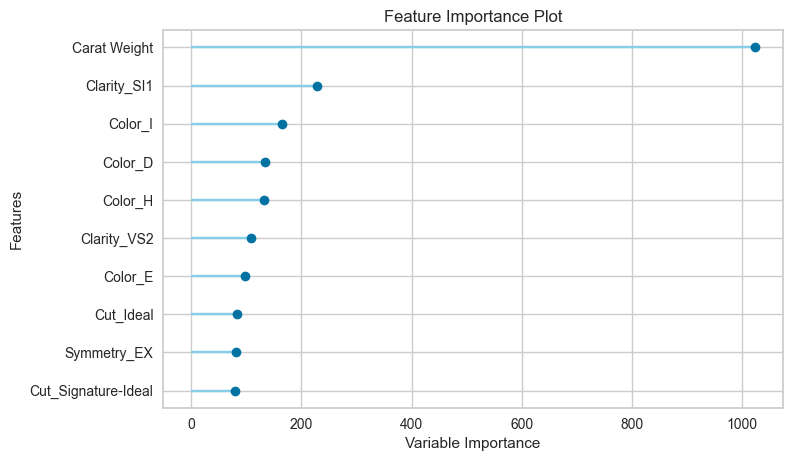

In [16]:
# check feature importance
plot_model(best, plot = 'feature')

In [18]:
!mlflow ui

^C


In [17]:
# finalize the model
final_best = finalize_model(best)
# save model to disk
save_model(final_best, 'diamond-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                                                          learning_rate=0.1,
                                                                          max_depth=-1,
                                                                          min_child_samples=20,
                                    

In [14]:
# check the residuals of trained model
plot_model(best, plot = 'residuals_interactive')

    'data': [{'hovertemplate': 'Split=train<br>Predictions…